In [2]:
#!/usr/bin/env python3
# book_id, alpha release
# Copyright 2018, Dextro Labs

In [3]:
# import the serious stuff
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import sys # replace this with argparse

In [4]:
# essential variables
sigma = 0.33
image_path = "sample_image.jpg"

In [5]:
# preprocess the image
input_image = cv2.imread(image_path)
height_ratio = input_image.shape[0] / 500
resized_image = imutils.resize(input_image, height = 500)

gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

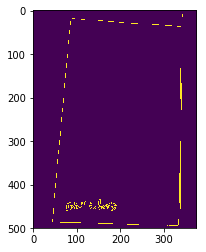

In [6]:
# detect edges
image_median = np.median(blurred_image)
lower_threshold = int(max(0, (1.0 - sigma) * image_median))
upper_threshold = int(min(255, (1.0 + sigma) * image_median))

edges = cv2.Canny(gray_image, lower_threshold, upper_threshold)
plt.imshow(edges)

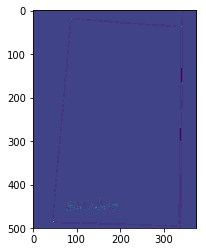

In [18]:
# find corners
corners = cv2.cornerHarris(edges, 2, 3, 0.04)
plt.imshow(corners)

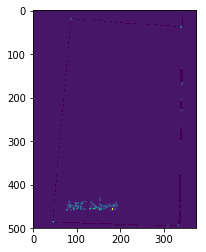

In [20]:
dilated_corners = cv2.dilate(corners, None)
plt.imshow(dilated_corners)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)